<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Hackathon de la II Feria de Empleo - UOC</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Clasificación de la calidad del aire</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

---
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Nombre y apellidos: <strong>Iñigo Alvarez Bianchi</strong>
</div>

---

# Clasificación de la calidad del aire

## Reto a desarrollar

El Acuerdo de París es un tratado internacional sobre el cambio climático que fue adoptado por 196 Partes en la COP21 de París. Su objetivo es limitar el calentamiento mundial muy por debajo de 2, preferiblemente a 1,5 grados centígrados, en comparación con los niveles preindustriales.

Para alcanzar este objetivo de temperatura a largo plazo, los países se proponen alcanzar el máximo de las emisiones de gases de efecto invernadero lo antes posible para lograr un planeta con clima neutro para mediados de siglo.

Es por ello que la Unión Europea esta destinando grandes cantidades de recursos al desarrollo de nuevas tecnologías que permitan la mejorar la lucha contra la contaminación. Una de estas es un nuevo tipo de sensor basado en tecnología láser que permita detectar la calidad del aire en función de diferentes mediciones.

## Datasets

- Variables del dataset:


    - Features: El dataset contiene 8 features en 8 columnas que son los parámetros medidos por los diferentes sensores. Estos corresponden a las diferentes interacciones que han tenido los haces de los láseres al travesar las partículas del aire.

    - Target: El target corresponde al 'label' que clasifica la calidad del aire.

        - Target 0 corresponde a una calidad del aire Buena
        - Target 1 corresponde a una calidad del aire Moderada
        - Target 2 corresponde a una calidad del aire Peligrosa
        


- Archivos:

    - uoc_train.csv: Este dataset contiene tanto las variables predictoras como el tipo de clasificación de calidad del aire.

    - uoc_test_X.csv: Este dataset contiene las variables predictoras con las que se tendrá que predecir el tipo de calidad de aire.

## Objetivo
El objetivo del reto será realizar un modelo predictivo basado en Random Forests que permita conocer el tipo de calidad del aire en función de las mediciones de los sensores.

## Carga de librerías

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


## Carga de los datos y análisis exploratorio preliminar

In [2]:
aire = pd.read_csv('uoc_train.csv') 

aire.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,-0.458258,-0.579012,2.886009,-0.075516,1.674060,-2.431912,0.534850,-0.846473,2
1,1.626615,-0.028332,-1.443184,-1.007447,-0.989093,1.202627,-0.038211,-1.298616,0
2,1.721356,-0.137676,-1.322593,-1.333187,-0.723713,0.843285,-0.588495,0.066682,0
3,-0.715103,3.265915,-0.791030,-2.967881,2.497628,-0.277387,-0.551611,0.668354,2
4,2.944098,0.197871,-2.257025,1.032789,-4.104693,4.716115,-0.380813,-1.393825,0


In [3]:
print("- Missing values por columnas: \n{}".format(aire.isnull().sum()))

- Missing values por columnas: 
feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
feature8    0
target      0
dtype: int64


In [4]:
aire.isna().any()

feature1    False
feature2    False
feature3    False
feature4    False
feature5    False
feature6    False
feature7    False
feature8    False
target      False
dtype: bool

### Variables categóricas:

La frecuencia de cada clase del atributo respuesta (target) es la siguiente:
 0    713
1    705
2    682
Name: target, dtype: int64


<AxesSubplot:>

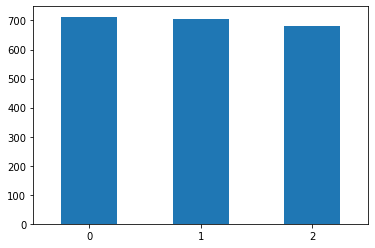

In [5]:
print("La frecuencia de cada clase del atributo respuesta (target) es la siguiente:\n",
      aire['target'].value_counts())

aire['target'].value_counts().plot.bar(x='target', rot=0)

### Variables numéricas:

In [6]:
aire.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.318846,0.005348,-0.327567,0.024042,0.085851,-0.065000,-0.025603,-0.004437,0.985238
std,1.575061,1.605428,1.479745,1.548154,1.788543,2.124337,1.015619,1.003342,0.815098
min,-5.031501,-6.004578,-5.470794,-5.296172,-5.719499,-4.910575,-3.850552,-3.541608,0.000000
25%,-1.406249,-1.119150,-1.368208,-1.083716,-1.136441,-1.613267,-0.701442,-0.659096,0.000000
50%,-0.431219,-0.162577,-0.532158,0.152545,0.102788,-0.431328,-0.007598,-0.019797,1.000000
75%,0.773896,1.127450,0.573801,1.173172,1.507492,1.162813,0.665932,0.667530,2.000000
max,5.388387,7.663112,4.869581,4.318758,6.033273,7.053420,4.400697,3.579874,2.000000


array([[<AxesSubplot:title={'center':'feature1'}>,
        <AxesSubplot:title={'center':'feature2'}>,
        <AxesSubplot:title={'center':'feature3'}>],
       [<AxesSubplot:title={'center':'feature4'}>,
        <AxesSubplot:title={'center':'feature5'}>,
        <AxesSubplot:title={'center':'feature6'}>],
       [<AxesSubplot:title={'center':'feature7'}>,
        <AxesSubplot:title={'center':'feature8'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

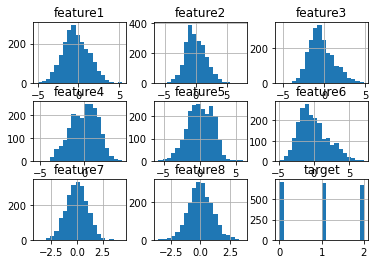

In [7]:
aire.hist(bins=20)

In [8]:
aire.drop(columns = ['target']).corr()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
feature1,1.000000,0.133659,-0.370671,-0.208025,-0.659398,0.696823,0.014668,0.040744
feature2,0.133659,1.000000,0.039532,-0.395318,0.145428,0.397361,0.007027,0.035793
feature3,-0.370671,0.039532,1.000000,0.127242,0.500785,-0.493455,0.005047,-0.045066
feature4,-0.208025,-0.395318,0.127242,1.000000,-0.527969,0.240207,0.014668,-0.019431
feature5,-0.659398,0.145428,0.500785,-0.527969,1.000000,-0.848052,-0.019511,-0.031318
feature6,0.696823,0.397361,-0.493455,0.240207,-0.848052,1.000000,0.020763,0.050178
feature7,0.014668,0.007027,0.005047,0.014668,-0.019511,0.020763,1.000000,-0.005921
feature8,0.040744,0.035793,-0.045066,-0.019431,-0.031318,0.050178,-0.005921,1.000000


## Entrenamiento y test de un modelo de clasificación supervisado Random Forest

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    aire.drop(columns = ['target']), aire['target'], test_size=0.2, random_state=24)

In [10]:
#param_grid = {"n_estimators": [25, 40, 50, 60, 75, 100, 150, 200], "max_depth": range(5, 15)}

param_grid = {"n_estimators": range(10, 100), "max_depth": range(5, 15)}

grid_model = GridSearchCV(RandomForestClassifier(random_state=20), param_grid, cv=4, n_jobs= -1 )
grid_model.fit(X_train, y_train)

print("\nLos mejores parámetros son: {}".format(grid_model.best_params_))


Los mejores parámetros son: {'max_depth': 12, 'n_estimators': 51}


In [11]:
best_n_estimators = grid_model.best_params_['n_estimators']
best_max_depth = grid_model.best_params_['max_depth']

In [12]:
rfc = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=20)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=51, random_state=20)

La precisión de modelo es: 0.907


Text(0.5, 1.05, 'Matriz de confusión')

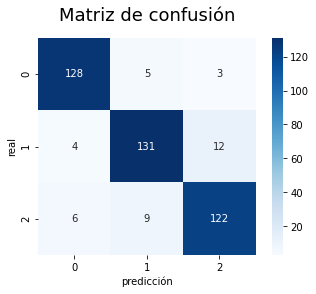

In [18]:
pred = rfc.predict(X_test)
print("La precisión de modelo es: {:.3f}".format(accuracy_score(y_test, pred))) 

matriz = confusion_matrix(y_test, pred)

sns.heatmap(matriz, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicción")
plt.ylabel("real")
plt.title('Matriz de confusión', y=1.05, size=18)

## Precidicción de nuevos casos

In [14]:
aire_X_test = pd.read_csv('uoc_X_test.csv') 

In [15]:
predic = rfc.predict(aire_X_test)

In [16]:
predicciones = pd.DataFrame(predic, columns=['final_status'])

predicciones

,final_status
0,0
1,2
2,1
3,0
4,2
...,...
895,1
896,2
897,2
898,2


In [19]:
predicciones.to_csv('predicciones.csv')